# Introduction

- The aim of this script is to show the probabilities distribution (PD from now) of Jennifer Pan's protest dataset
- We choose the "prob2_combined", namely the "combined predicted probability from second stage text and image classifiers", as it has the best results (see p.26 of Pan's paper)
- We have to normalized data as some probabilities are above 1.0
- We show PD and compare it to the normal distribution
    - They do not fit. But PD seems to fit the decreasing part of a normal distribution. My hypothesis (not verified) is that Pan only published tweets with a high probability of protest
- We choose to use tweets above 75% to construct our positive set

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

In [110]:
protest_posts = '../data/raw/protest_posts.csv'
df = pd.read_csv(protest_posts, sep='\t')

print(f'Number of tweets: {len(df)}')

Number of tweets: 273950


In [86]:
# Get the probabilities of the second-stage CNN-RNN combined with the CNN

probabilities = df["prob2_combined"]

In [87]:
# For some reason the hightest probibility is above one

print(f'Maximum probability: {max(probabilities)}')
print(f'Minimum probability: {min(probabilities)}')

above_1 = probabilities[probabilities > 1]
print(f'Number of cases above 100%: {len(above_1)}')

Maximum probability: 1.136242866386625
Minimum probability: 0.6643013742953843
Number of cases above 100%: 37250


In [88]:
# We have to normalize data

probabilities_normalized = probabilities / max(probabilities)
print(f'Max probability after normalization: {max(probabilities_normalized)}')

Max probability after normalization: 1.0


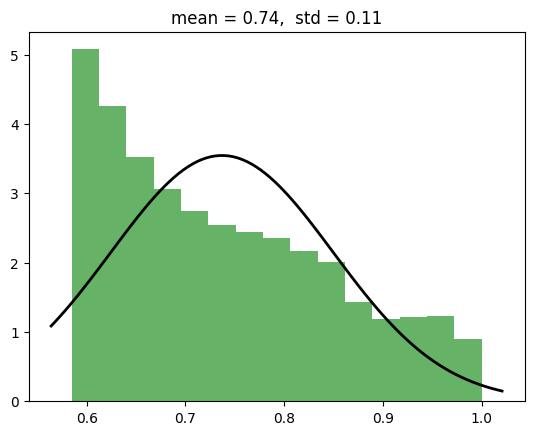

In [109]:
# See probabilities distribution and compare to normal distribution

plt.hist(probabilities_normalized, bins=15, alpha=0.6, color='g', density=True)

# Mean and std deviation
mu, std = probabilities_normalized.mean(), probabilities_normalized.std()

# Output graph
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
title = f"mean = {round(mu, 2)},  std = {round(std, 2)}"
plt.title(title)

plt.show()

## Commentary

We see that the probabitilies distribution does not fit the normal distribution. My hypothesis (not verified) is that Pan only published tweets with a high probability of protest.

In [90]:
# We choose to only conserve tweets above 65% probability of being a protest to construct our dataset

positive_set = probabilities_normalized[probabilities_normalized > 0.75]
percentage = round(len(positive_set) / len(probabilities_normalized) * 100, 1)

print(f'Number of cases above 75% probability: {len(positive_set)}')
print(f'Percentage of cases above 75% probability: {percentage}%')

Number of cases above 75% probability: 113771
Percentage of cases above 75% probability: 41.5%


In [99]:
# We actually have to "unnormalized" the threshold probability so it would fit to the probabilities in the original dataset

threshold = 0.75*max(probabilities)
tweets_above_threshold = df[df['prob2_combined'] > threshold]['content']

In [102]:
# Generate positive set

tweets_above_threshold.to_csv('../data/clean/tweets_positive.txt', header=False, index=False)